## Uploading Dataset

In [1]:
import gdown

file_id = "1x0_jk9IJLkpk5lLeNMJHkg4-XwJ8h6A3"
output = "Data.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1x0_jk9IJLkpk5lLeNMJHkg4-XwJ8h6A3
From (redirected): https://drive.google.com/uc?id=1x0_jk9IJLkpk5lLeNMJHkg4-XwJ8h6A3&confirm=t&uuid=a16dca2b-01fd-4804-b2d4-65e7742d8be0
To: /content/Data.zip
100%|██████████| 140M/140M [00:04<00:00, 32.7MB/s]


'Data.zip'

## Extracting the Dataset

In [2]:
import zipfile

with zipfile.ZipFile("Data.zip", "r") as z:
    z.extractall("Data")

## Checking the folder structure

In [3]:
import os
print(os.listdir("Data/Project_1"))

['stop_dataset', 'Testing_Image_1.jpeg', 'Testing_Image_2.jpg']


## Counting Images

In [4]:
import os
notstop_count = len(os.listdir("Data/Project_1/stop_dataset/not_stop"))
stop_count = len(os.listdir("Data/Project_1/stop_dataset/stop"))

print("Not Stop images:", notstop_count)
print("Stop images:", stop_count)
print("Total images:", notstop_count + stop_count)

Not Stop images: 100
Stop images: 97
Total images: 197


## Sample Images

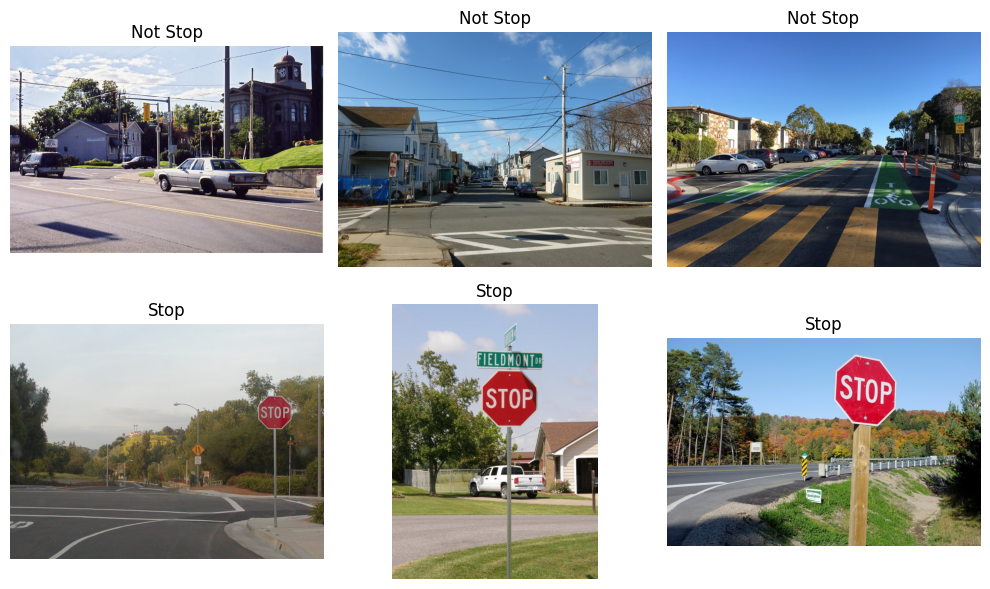

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

notstop_samples = random.sample(os.listdir("Data/Project_1/stop_dataset/not_stop"), 3)
stop_samples = random.sample(os.listdir("Data/Project_1/stop_dataset/stop"), 3)

plt.figure(figsize=(10,6))

for i, fname in enumerate(notstop_samples):
    img = mpimg.imread(f"Data/Project_1/stop_dataset/not_stop/{fname}")
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title("Not Stop")
    plt.axis("off")

for i, fname in enumerate(stop_samples):
    img = mpimg.imread(f"Data/Project_1/stop_dataset/stop/{fname}")
    plt.subplot(2,3,i+4)
    plt.imshow(img)
    plt.title("Stop")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Preprocessing

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    "Data/Project_1/stop_dataset",
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    "Data/Project_1/stop_dataset",
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 158 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [7]:
print(train_gen.class_indices)

{'not_stop': 0, 'stop': 1}


## Building a CNN model

In [8]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

## Compiling the Model

In [9]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

## Training the CNN model

In [10]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5004 - loss: 0.7705 - val_accuracy: 0.4872 - val_loss: 0.6916
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 826ms/step - accuracy: 0.5086 - loss: 0.6964 - val_accuracy: 0.4872 - val_loss: 0.6824
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 875ms/step - accuracy: 0.5016 - loss: 0.6834 - val_accuracy: 0.6154 - val_loss: 0.6692
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 966ms/step - accuracy: 0.5887 - loss: 0.6749 - val_accuracy: 0.8205 - val_loss: 0.6310
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 823ms/step - accuracy: 0.5888 - loss: 0.6527 - val_accuracy: 0.7179 - val_loss: 0.5876
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 925ms/step - accuracy: 0.7144 - loss: 0.6070 - val_accuracy: 0.7949 - val_loss: 0.5118
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 882ms/step - accuracy: 0.7134 - loss: 0.5383 - val_accuracy: 0.8718 - val_loss: 0.4529
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 783ms/step - accuracy: 0.8129 - loss: 0.4495 - val_accuracy: 0.8718 - val_loss: 0

## Summary of the model

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,049,797 (19.26 MB)

 Trainable params: 1,683,265 (6.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,366,532 (12.84 MB)

## Visualizing training results

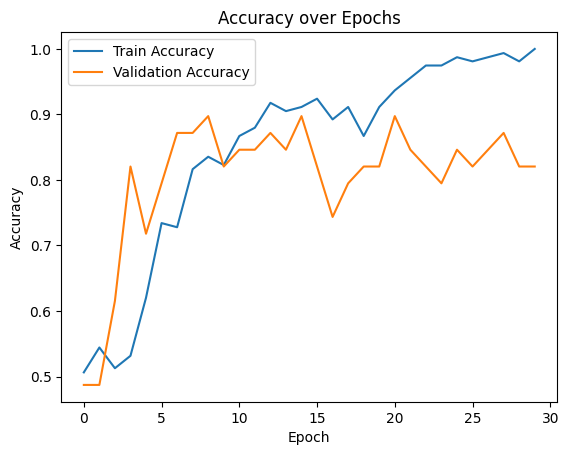

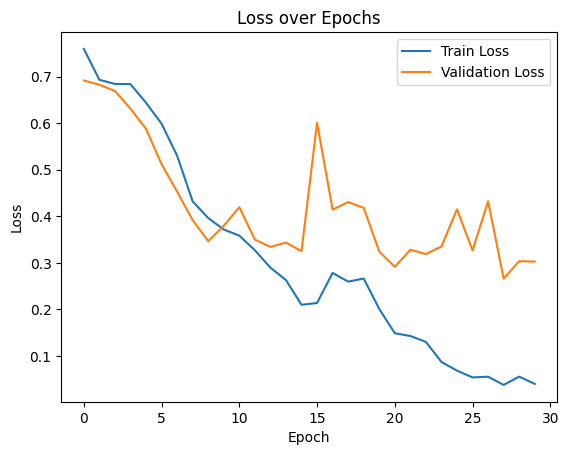

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Tested on validation images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


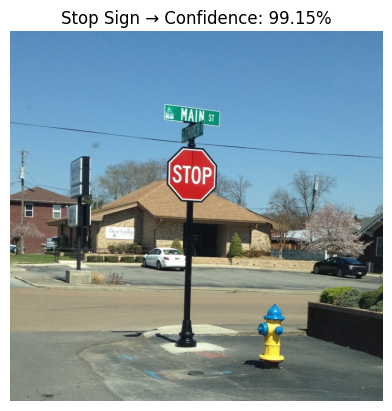

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


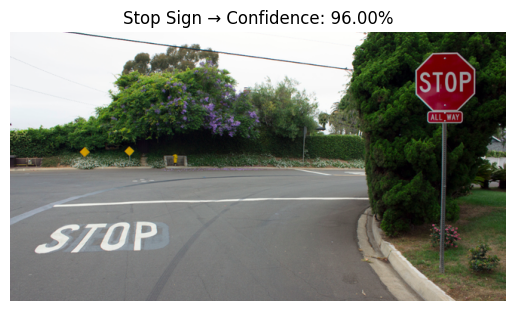

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


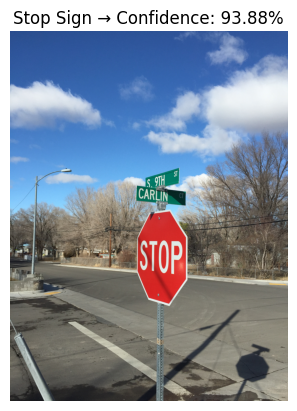

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


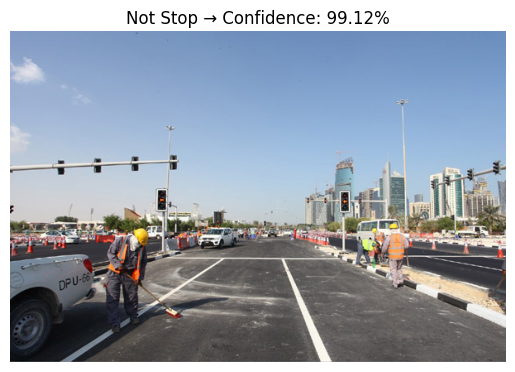

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


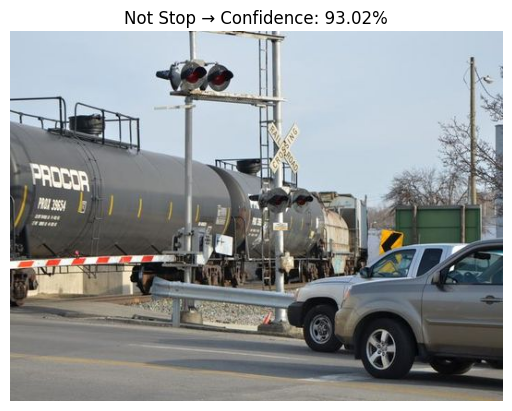

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


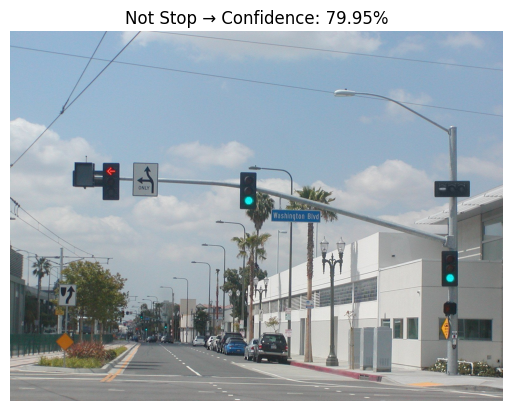

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, random

stop_folder = "Data/Project_1/stop_dataset/stop"
not_stop_folder = "Data/Project_1/stop_dataset/not_stop"

stop_samples = random.sample(os.listdir(stop_folder), 3)
not_stop_samples = random.sample(os.listdir(not_stop_folder), 3)
all_samples = [(stop_folder, f) for f in stop_samples] + [(not_stop_folder, f) for f in not_stop_samples]

for folder, fname in all_samples:
    file_path = os.path.join(folder, fname)

    img = cv2.imread(file_path)
    if img is None:
        print(f"Cannot read file: {file_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (64, 64))
    img_array = np.expand_dims(img_resized / 255.0, axis=0)
    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        label = "Stop Sign"
        confidence = prediction * 100
    else:
        label = "Not Stop"
        confidence = (1 - prediction) * 100

    plt.imshow(img_rgb)
    plt.title(f"{label} → Confidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

## Testing on new Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


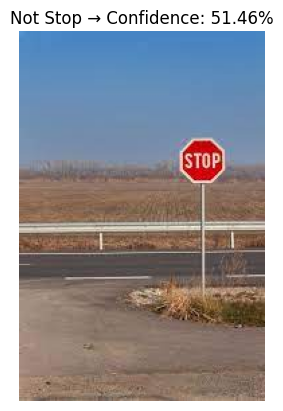

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


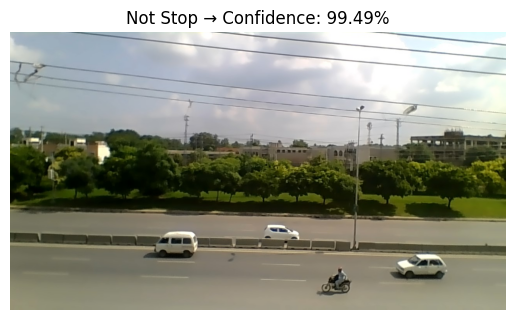

In [22]:
new_images = [ "Data/Project_1/Testing_Image_1.jpeg",  "Data/Project_1/Testing_Image_2.jpg"]
for file_path in new_images:
    img = cv2.imread(file_path)
    if img is None:
        print(f"Cannot read file: {file_path}")
        continue
    h, w = img.shape[:2]
    scale = 64 / min(h, w)
    new_h, new_w = int(h*scale), int(w*scale)
    img_resized = cv2.resize(img, (new_w, new_h))

    start_h = (new_h - 64) // 2
    start_w = (new_w - 64) // 2
    img_cropped = img_resized[start_h:start_h+64, start_w:start_w+64]

    img_array = np.expand_dims(img_cropped / 255.0, axis=0)

    prediction = model.predict(img_array)[0][0]
    pred_class = int(round(prediction))

    label = "Stop Sign" if pred_class == 1 else "Not Stop"
    confidence = prediction*100 if pred_class==1 else (1-prediction)*100

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"{label} → Confidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()